# Home Credit Default Risk

The objective of this project is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification project.

## Classification: 
The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan)

## Data
The data is provided by Home Credit, a service dedicated to provided lines of credit (loans) to the unbanked population. There are 7 data sources.

##### Application_train (307,511 obs, 121 features, 1 binary target variable )/Application_test(48744 obs, 121 features): 
The main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.
    
##### Bureau: 
Data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
    
##### Bureau_balance: 
Monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
    
##### Previous_application: 
Previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
    
##### POS_CASH_BALANCE: 
Monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
    
##### Credit_card_balance: 
Monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
    
##### Installments_payment: 
Payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.


In [135]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

#Loading Packages used in the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE, Imputer, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
df_train = pd.read_csv('C:\\kaamkidrive\\Python\\Kaggle\\HomeCreditDefaultRisk\\application_train.csv')
df_test = pd.read_csv('C:\\kaamkidrive\\Python\\Kaggle\\HomeCreditDefaultRisk\\application_test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [5]:
df_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [6]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis (EDA)

In [7]:
df_train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [8]:
print("Percent defaulters in Training Dataset:","{0:.2f}%".format(100*df_train.TARGET.sum()/df_train.shape[0]))

Percent defaulters in Training Dataset: 8.07%


## Missing Values:
We could drop the column with high missing values or impute the missing values with appropriate mean/median/zero. Technique such as XGBoost takes care of the missing value and hence we will keep the missing value column for the time being.

There are 67 columns with missing values with 57 columns have more than 13% of the values missing

In [9]:
percent_missing = (100*df_train.isnull().sum()/df_train.shape[0]).sort_values(ascending = False)
percent_missing[percent_missing > 0]

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

## Handling Categorical Variables - Encoding Labels

###### Binary Variables : Label Encoding
###### Multi Category Variables: One-hot Encoding

In [10]:
df_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [11]:
df_train.select_dtypes('object').nunique().sort_values()

NAME_CONTRACT_TYPE             2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
EMERGENCYSTATE_MODE            2
CODE_GENDER                    3
HOUSETYPE_MODE                 3
FONDKAPREMONT_MODE             4
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
NAME_TYPE_SUITE                7
WEEKDAY_APPR_PROCESS_START     7
WALLSMATERIAL_MODE             7
NAME_INCOME_TYPE               8
OCCUPATION_TYPE               18
ORGANIZATION_TYPE             58
dtype: int64

###### Label Encoder

In [12]:
df_train.EMERGENCYSTATE_MODE.fillna("No", inplace = True)
df_test.EMERGENCYSTATE_MODE.fillna("No", inplace = True)

In [13]:
le = LE()

for col in df_train.columns:
    if (df_train[col].dtype == 'object'):
        if(df_train[col].nunique() == 2):
            print("Label Encoded for Column - ", col)
            le.fit(df_train[col])
            df_train[col] = le.transform(df_train[col])
            df_test[col] = le.transform(df_test[col])

Label Encoded for Column -  NAME_CONTRACT_TYPE
Label Encoded for Column -  FLAG_OWN_CAR
Label Encoded for Column -  FLAG_OWN_REALTY
Label Encoded for Column -  EMERGENCYSTATE_MODE


In [14]:
# one-hot encoding of categorical variables
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

In [15]:
#Aligining training and testing data as one hot encoder created variables in training data not present in the test data
print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

train_labels = df_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)

# Add the target back in
df_train['TARGET'] = train_labels

print('Training Features shape after alignment: ', df_train.shape)
print('Testing Features shape after alignment: ', df_test.shape)

Training Features shape:  (307511, 242)
Testing Features shape:  (48744, 238)
Training Features shape after alignment:  (307511, 239)
Testing Features shape after alignment:  (48744, 238)


In [16]:
df_train.dtypes.value_counts()

uint8      129
float64     65
int64       41
int32        4
dtype: int64

## Data Outliers/Incosistencies

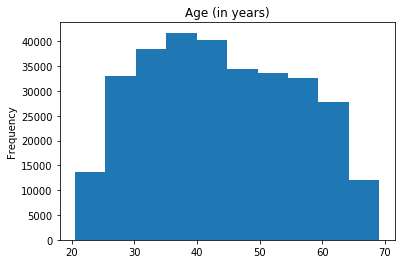

In [17]:
(-df_train.DAYS_BIRTH/365).plot.hist(title = 'Age (in years)')


count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

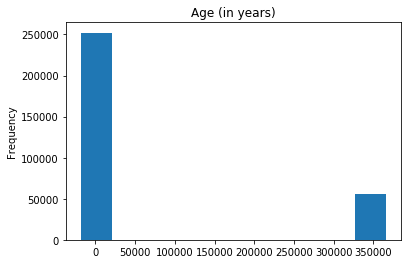

In [18]:
df_train.DAYS_EMPLOYED.plot.hist(title = 'Age (in years)')
df_train.DAYS_EMPLOYED.describe()

###### There are some inconsistent values marked as 365243. Hence, Creating a flag variable for incosistent values and replacing those with NaN values so that those could be imputed later on while not losing information at the same time. Performing the same operation for test data set

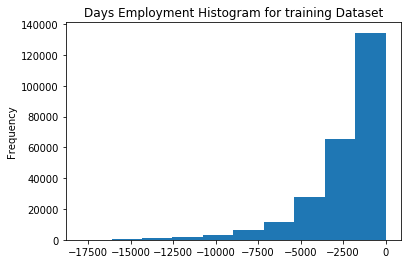

In [19]:
# Create an inconsistent flag column
df_train['DAYS_EMPLOYED_ANOM'] = df_train["DAYS_EMPLOYED"] == 365243

# Replace the incosistent values with nan
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram for training Dataset')

df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243
df_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)


## Correlation with the Target Variable

In [20]:
corr = df_train.corr().TARGET.sort_values(ascending = False)
print("Positively Correlated Variables \n", corr.head(10))
print("Negatively Correlated Variables \n", corr.tail(10))

Positively Correlated Variables 
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
NAME_INCOME_TYPE_Working       0.057481
DAYS_LAST_PHONE_CHANGE         0.055218
CODE_GENDER_M                  0.054713
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64
Negatively Correlated Variables 
 FLOORSMAX_MEDI                         -0.043768
FLOORSMAX_AVG                          -0.044003
DAYS_EMPLOYED_ANOM                     -0.045987
ORGANIZATION_TYPE_XNA                  -0.045987
NAME_INCOME_TYPE_Pensioner             -0.046209
CODE_GENDER_F                          -0.054704
NAME_EDUCATION_TYPE_Higher education   -0.056593
EXT_SOURCE_1                           -0.155317
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_3                           -0.178919
Name: TARGET,

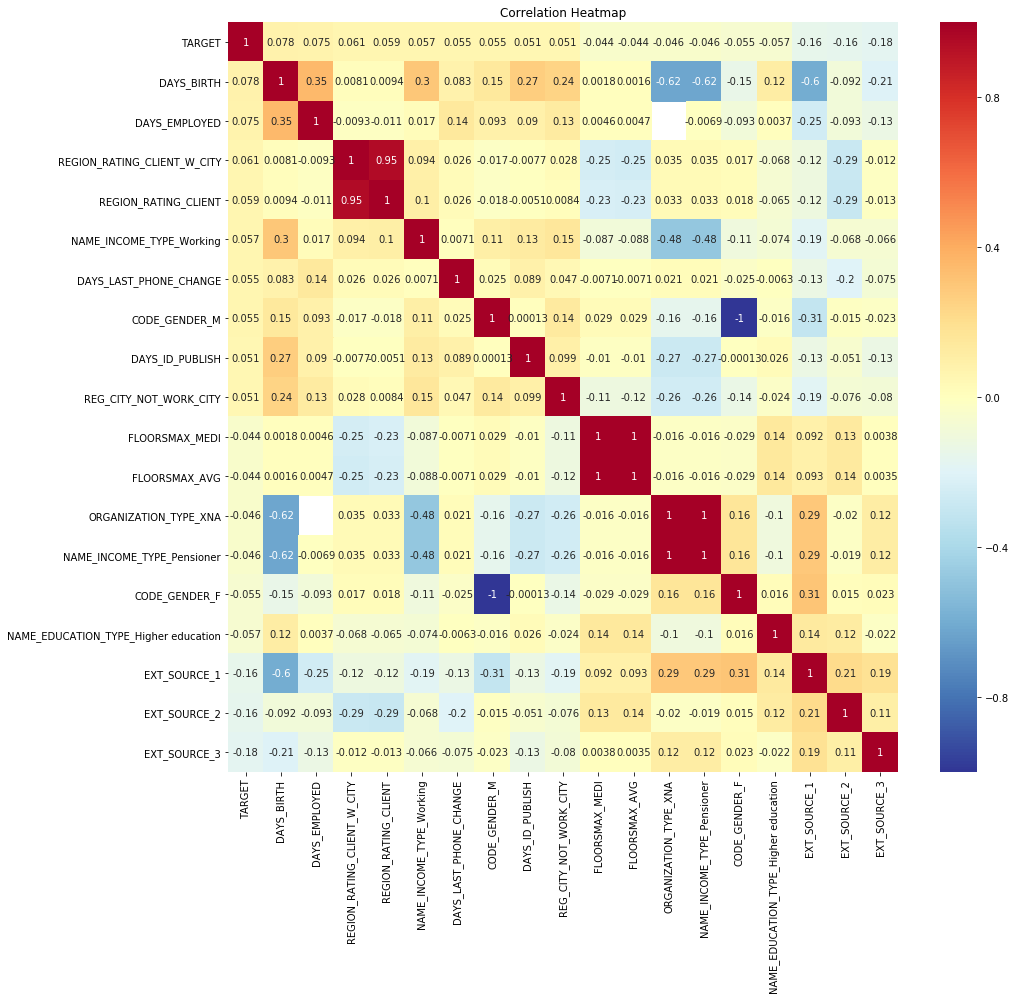

In [21]:
# Lets look at the heat map for these variables with significant correlation

colsForHeatMap = ['TARGET','DAYS_BIRTH','DAYS_EMPLOYED','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','NAME_INCOME_TYPE_Working','DAYS_LAST_PHONE_CHANGE','CODE_GENDER_M','DAYS_ID_PUBLISH','REG_CITY_NOT_WORK_CITY','FLOORSMAX_MEDI','FLOORSMAX_AVG','ORGANIZATION_TYPE_XNA','NAME_INCOME_TYPE_Pensioner','CODE_GENDER_F','NAME_EDUCATION_TYPE_Higher education','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']
heatmapdata = df_train[colsForHeatMap]
corrHeatMap = heatmapdata.corr() 
#heatmapdata.info()
plt.figure(figsize = (15, 14))

# Heatmap of correlations
#sns.heatmap(corrHeatMap, cmap = plt.cm.RdYlBu_r, vmin = -0.5, annot = True, vmax = 0.75)
sns.heatmap(corrHeatMap, cmap = plt.cm.RdYlBu_r, annot = True)

plt.title('Correlation Heatmap');
plt.tight_layout()

###### Analyzing some of the variables individually with high positive and negative correlation

C:\Users\mohit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


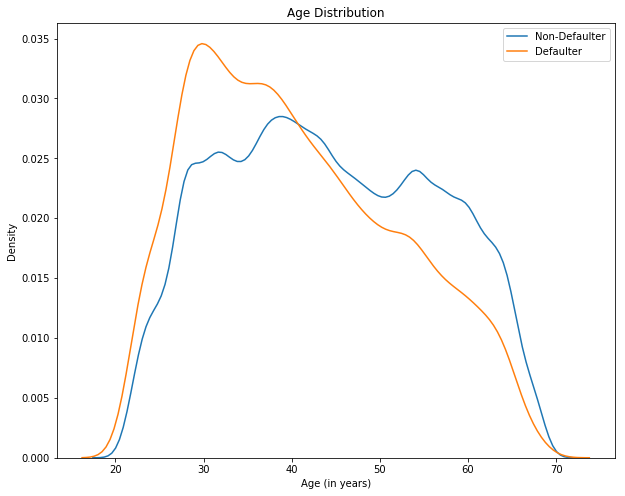

In [22]:
""" DAYS_BIRTH has positive correlation but the values are negative implying as the age of the applicant increases, 
he is less likely to default on the loan """

#We have already looked at the distribution of DAYS_BIRTH but lets look at the density for defaulters vs non-defaulters.

plt.figure(figsize = (10, 8))

# KDE plot for non-defaulters
sns.kdeplot(-df_train.loc[df_train.TARGET == 0, 'DAYS_BIRTH'] / 365, label = 'Non-Defaulter')

# KDE plot for defaulters
sns.kdeplot(-df_train.loc[df_train.TARGET == 1, 'DAYS_BIRTH'] / 365, label = 'Defaulter')

plt.title('Age Distribution');plt.xlabel("Age (in years)");plt.ylabel("Density");

C:\Users\mohit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mohit\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


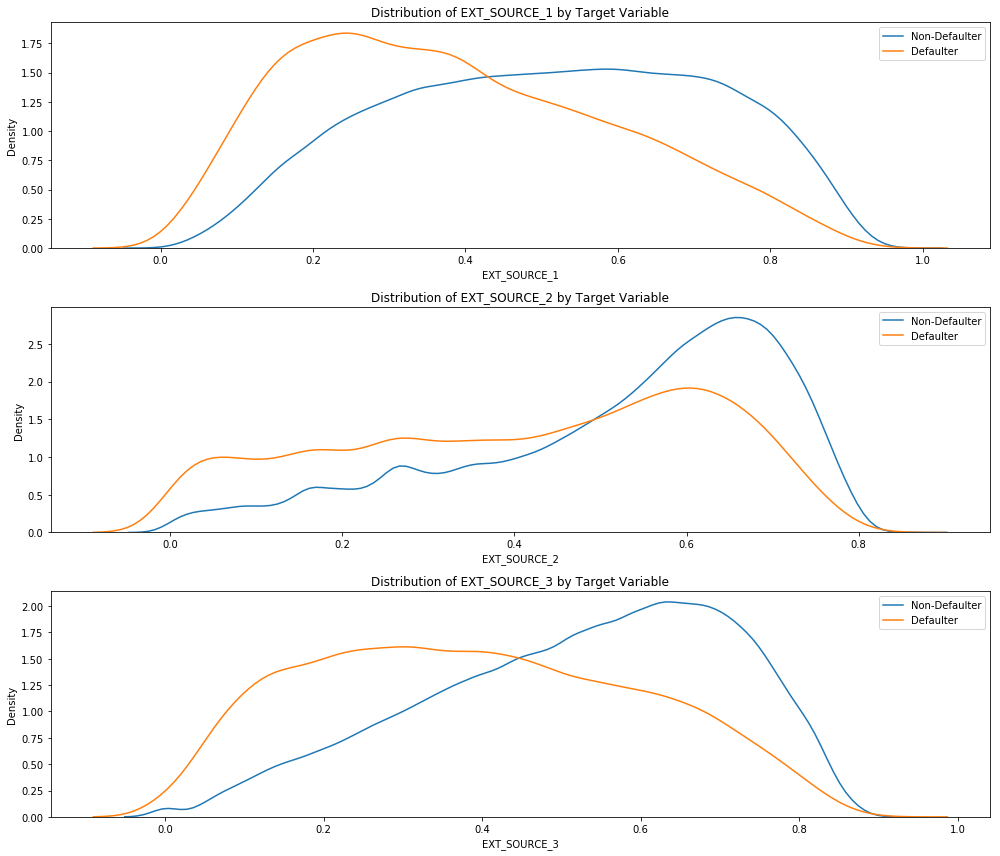

In [23]:
"""External Source (these are 3 scores from an external data source ) seems to have the most negative correlation. 
Creating Density plot for those 3 positively correlated vars  """

externalScore = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']

plt.figure(figsize = (14,12))
#print(len(externalScore))
for i , var in enumerate(externalScore):
    plt.subplot(len(externalScore),1,i+1)
    sns.kdeplot(df_train.loc[df_train.TARGET==0,var], label = 'Non-Defaulter')
    sns.kdeplot(df_train.loc[df_train.TARGET==1,var], label = 'Defaulter')
    plt.title("Distribution of {} by Target Variable".format(var))
    plt.xlabel(var);plt.ylabel("Density");
plt.tight_layout()


## Feature Engineering

### Polynomial Features:
Although, polynomia feature engineering doesnt get used much in the machine learning, nonetheless we will be creating 3rd degree polynomial features and their interaction terms for the variables with high degree of correlation to test

In [118]:
"""Features to be considered for polynomial feature engineering"""

polyFeatures = ['TARGET','DAYS_BIRTH','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']
df_train_poly = df_train[polyFeatures]

polyFeatures_test = ['DAYS_BIRTH','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']
df_test_poly = df_test[polyFeatures_test]

# Treating missing values with Median 
imputer = Imputer(strategy = 'median')
target_poly = df_train_poly['TARGET']
df_train_poly.drop(columns = 'TARGET', axis = 1, inplace = True)

df_train_poly = imputer.fit_transform(df_train_poly)
df_test_poly = imputer.transform(df_test_poly)

###### Creating polynomial features and interaction terms and training the model

In [119]:
transform_poly = PolynomialFeatures(degree = 3)
df_train_poly = transform_poly.fit_transform(df_train_poly)
df_test_poly = transform_poly.transform(df_test_poly)
print('Training Features shape after polynomial transformation: ', df_train_poly.shape)
print('Testing Features shape after polynomial transformation: ', df_test_poly.shape)

Training Features shape after polynomial transformation:  (307511, 35)
Testing Features shape after polynomial transformation:  (48744, 35)


In [120]:
# Creating a dataframe using the polynomial features from the numpy array created after the transformation
transform_poly.get_feature_names(input_features = ['DAYS_BIRTH','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'])[:15]
df_train_poly = pd.DataFrame(df_train_poly, 
                columns = transform_poly.get_feature_names(input_features = [ 'DAYS_BIRTH','EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                             'EXT_SOURCE_3']))

In [121]:
#Testing Correlations between polynomia features and target variable
df_train_poly['TARGET'] = target_poly
poly_corr = df_train_poly.corr()['TARGET'].sort_values()
print(poly_corr)

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
EXT_SOURCE_2^2                           -0.149512
EXT_SOURCE_3^2                           -0.141662
EXT_SOURCE_2^3                           -0.140243
EXT_SOURCE_1^2 EXT_SOURCE_2              -0.140185
EXT_SOURCE_1^2 EXT_SOURCE_3              -0.138846
DAYS_BIRTH^2 EXT_SOURCE_2                -0.132839
EXT_SOURCE_3^3                           -0.128213
DAYS_BIRTH^2 EXT_SOURCE_3                -0.126950
EXT_SOURCE_1                             -0.098887
DAYS_BIRTH^2 EXT_SOURCE_1      

###### A no of these polynomia features have higher correlations than original variable. we will test it out if these variables while building the model

In [122]:
# Adding these Polynomial features to the training and testing data
df_test_poly = pd.DataFrame(df_test_poly, 
                columns = transform_poly.get_feature_names(input_features = [ 'DAYS_BIRTH','EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                             'EXT_SOURCE_3']))
df_train_poly['SK_ID_CURR'] = df_train['SK_ID_CURR']
df_train_poly = df_train.merge(df_train_poly, on = 'SK_ID_CURR', how = 'left')

df_test_poly['SK_ID_CURR'] = df_test['SK_ID_CURR']
df_test_poly = df_test.merge(df_test_poly, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
df_train_poly, df_test_poly = df_train_poly.align(df_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', df_train_poly.shape)
print('Testing data with polynomial features shape:  ', df_test_poly.shape)

Training data with polynomial features shape:  (307511, 274)
Testing data with polynomial features shape:   (48744, 274)


### Creating Credit variables to asses credit risk 

In [42]:
df_train_credit = df_train.copy()
df_test_credit = df_test.copy()

# Creating loan to income ratio, EMI to Income, Duration of loan, Employment duration vs age
df_train_credit['loanToIncome'] = df_train_credit['AMT_CREDIT'] / df_train_credit['AMT_INCOME_TOTAL']
df_train_credit['emiToIncome'] = df_train_credit['AMT_ANNUITY'] / df_train_credit['AMT_INCOME_TOTAL']
df_train_credit['loanDuration'] = df_train_credit['AMT_ANNUITY'] / df_train_credit['AMT_CREDIT']
df_train_credit['daysEmployedToAge'] = df_train_credit['DAYS_EMPLOYED'] / df_train_credit['DAYS_BIRTH']

df_test_credit['loanToIncome'] = df_test_credit['AMT_CREDIT'] / df_test_credit['AMT_INCOME_TOTAL']
df_test_credit['emiToIncome'] = df_test_credit['AMT_ANNUITY'] / df_test_credit['AMT_INCOME_TOTAL']
df_test_credit['loanDuration'] = df_test_credit['AMT_ANNUITY'] / df_test_credit['AMT_CREDIT']
df_test_credit['daysEmployedToAge'] = df_test_credit['DAYS_EMPLOYED'] / df_test_credit['DAYS_BIRTH']


###### EDA for Credit Variables

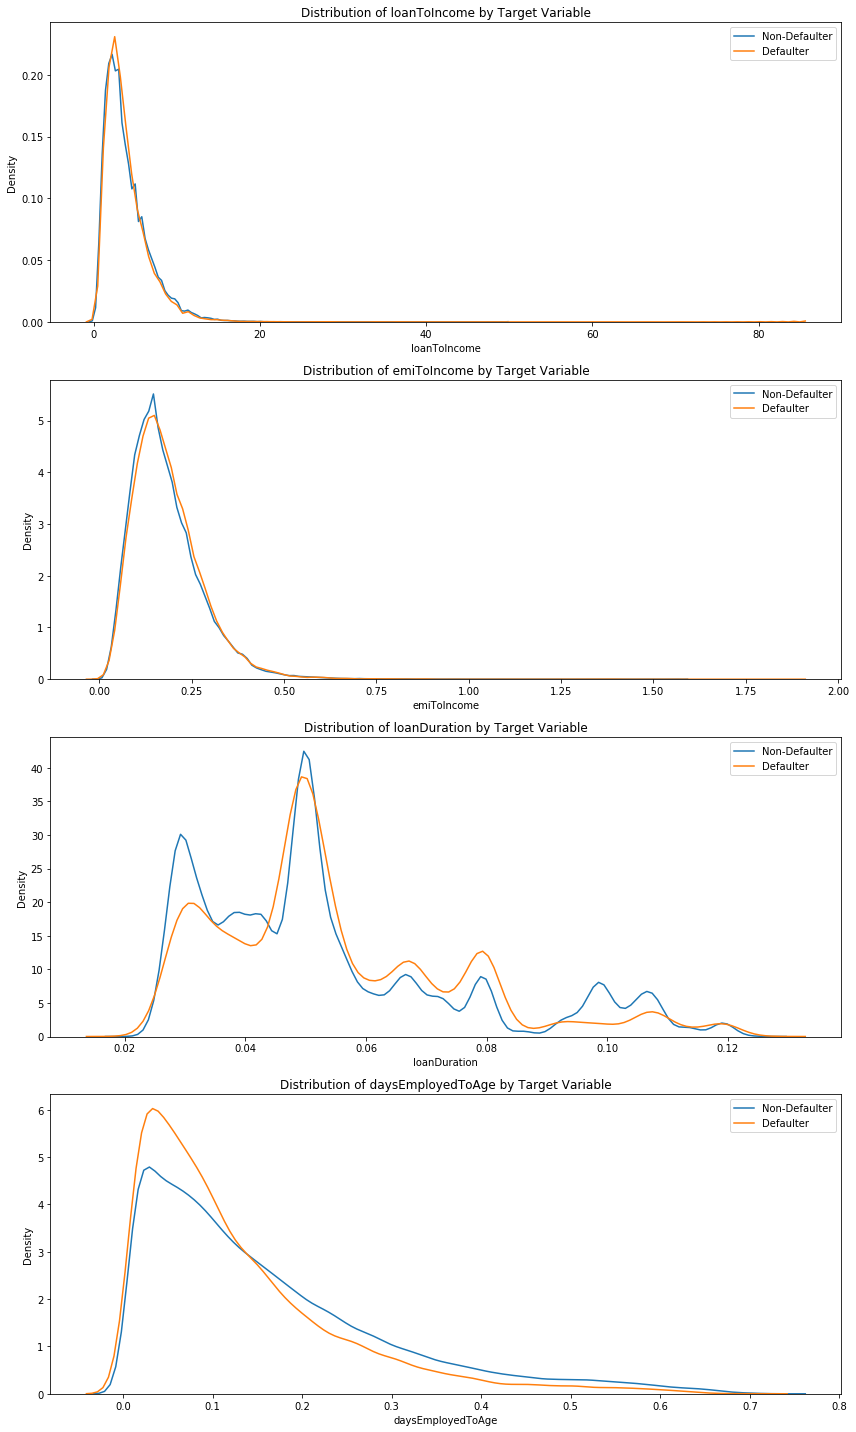

In [43]:
plt.figure(figsize = (12, 20))
creditVars = ['loanToIncome','emiToIncome','loanDuration','daysEmployedToAge']
for i, var in enumerate(creditVars):
        plt.subplot(len(creditVars),1,i+1)
        sns.kdeplot(df_train_credit.loc[df_train.TARGET==0,var], label = 'Non-Defaulter')
        sns.kdeplot(df_train_credit.loc[df_train.TARGET==1,var], label = 'Defaulter')
        plt.title("Distribution of {} by Target Variable".format(var))
        plt.xlabel(var);plt.ylabel("Density");
plt.tight_layout()

    

# Logistric Regression Model
###### Here we will be predicting the probablity of default on the loan, hence implementing logistic regression model and then we will go on to use other machine learning model to compare across different techniques


In [99]:
# SCaling the data and Missing value treatment
y = df_train['TARGET']
X_train = df_train.drop(columns = ['TARGET'], axis = 1)

train, test, train_labels, test_labels = train_test_split(X_train, y, test_size=0.2, random_state=0)


#Feature List
features = train.columns

#Imputing missing value with median
imputer = Imputer(strategy = 'median')
imputer.fit(train)

train = imputer.transform(train)
test = imputer.transform(test)

#Scaling the data between 0-1

scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)


Training data shape:  (246008, 239)
Testing data shape:  (61503, 239)


In [102]:
# Fitting a baseline logistic Regression model 

logModel = LogisticRegression(C = 0.1)
logModel.fit(train,train_labels)
#logModel.score(train,train_labels)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [111]:
#Assesing Model Performance on Trainig
predictions = logModel.predict(train)
print("                     Training Data           \n")
print("\n Classification Report: \n\n",classification_report(train_labels,predictions))
print("\n Confusion Matrix: \n\n", confusion_matrix(train_labels,predictions))
print("\n Accuracy Score: \n\n", accuracy_score(train_labels,predictions))
print("\n ROC AUC Score : \n\n", roc_auc_score(train_labels,logModel.predict_proba(train)[:,1]))

                     Training Data           


 Classification Report: 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96    226038
           1       0.46      0.01      0.02     19970

   micro avg       0.92      0.92      0.92    246008
   macro avg       0.69      0.50      0.49    246008
weighted avg       0.88      0.92      0.88    246008


 Confusion Matrix: 

 [[225817    221]
 [ 19779    191]]

 Accuracy Score: 

 0.9187018308347696

 ROC AUC Score : 

 0.746685300825711


In [112]:
#Assesing Model Performance on Testing
predictions_test = logModel.predict(test)

print("                     Testing Data           \n")
print("\n Classification Report: \n\n",classification_report(test_labels,predictions_test))
print("\n Confusion Matrix: \n\n", confusion_matrix(test_labels,predictions_test))
print("\n Accuracy Score: \n\n", accuracy_score(test_labels,predictions_test))
print("\n ROC AUC Score : \n\n", roc_auc_score(test_labels,logModel.predict_proba(test)[:,1]))

                     Testing Data           


 Classification Report: 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56648
           1       0.49      0.01      0.02      4855

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.71      0.50      0.49     61503
weighted avg       0.89      0.92      0.88     61503


 Confusion Matrix: 

 [[56600    48]
 [ 4808    47]]

 Accuracy Score: 

 0.9210445018942165

 ROC AUC Score : 

 0.7443830409658664


In [53]:
#Predicting Probabilities in the test dataset for target = 1 (which is in the second column of predict_proba) 
logPredict = logModel.predict_proba(test)[:,1]
#outputData = df_test[['SK_ID_CURR']]
#outputData['TARGET'] = logPredict 
#outputData.head()

,SK_ID_CURR,TARGET
0,100001,0.068224
1,100005,0.126392
2,100013,0.082641
3,100028,0.061202
4,100038,0.126185


# Random Forest - Improved Model
######  Our base line model performance is pretty bad, we will try improving using a random forest classifer on the training dataset and using around 100 trees

In [106]:
# Random forest classifier
randomForest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
randomForest.fit(train,train_labels)

# Extract feature importances
feature_importance_values = randomForest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.6s finished


In [113]:
#Assesing Model Performance on Testing
#predictions = randomForest.predict_proba(test)[:, 1]

predictions_test = randomForest.predict(test)
print("                     Testing Data - Random Forest           \n")
print("\n Classification Report: \n\n",classification_report(test_labels,predictions_test))
print("\n Confusion Matrix: \n\n", confusion_matrix(test_labels,predictions_test))
print("\n Accuracy Score: \n\n", accuracy_score(test_labels,predictions_test))
print("\n ROC AUC Score : \n\n", roc_auc_score(test_labels,randomForest.predict_proba(test)[:,1]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


                     Testing Data - Random Forest           


 Classification Report: 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56648
           1       0.90      0.00      0.00      4855

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.91      0.50      0.48     61503
weighted avg       0.92      0.92      0.88     61503


 Confusion Matrix: 

 [[56647     1]
 [ 4846     9]]

 Accuracy Score: 

 0.9211908362193714


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s



 ROC AUC Score : 

 0.7123372117782012


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


### Predictions using Engineered Features - Using Polynomial Features

In [128]:
poly_features_names = list(df_train_poly.columns)
#y_poly = df_train_poly['TARGET']
#X_train_poly = df_train_poly.drop(columns = ['TARGET'], axis = 1)

train_poly, test_poly, train_poly_labels, test_poly_labels = train_test_split(df_train_poly, target_poly, test_size=0.2, random_state=0)


# Impute the polynomial features
imputer = Imputer(strategy = 'median')

poly_features_train = imputer.fit_transform(train_poly)
poly_features_test = imputer.transform(test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features_train = scaler.fit_transform(poly_features_train)
poly_features_test = scaler.transform(poly_features_test)

randomForest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
randomForest_poly.fit(poly_features_train, train_poly_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   59.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=50, verbose=1, warm_start=False)

In [129]:
#Assesing Model Performance on Testing

predictions_test = randomForest_poly.predict(poly_features_test)
print("         Testing Data with Polynomial Features - Random Forest           \n")
print("\n Classification Report: \n\n",classification_report(test_poly_labels,predictions_test))
print("\n Confusion Matrix: \n\n", confusion_matrix(test_poly_labels,predictions_test))
print("\n Accuracy Score: \n\n", accuracy_score(test_poly_labels,predictions_test))
print("\n ROC AUC Score : \n\n", roc_auc_score(test_poly_labels,randomForest_poly.predict_proba(poly_features_test)[:,1]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


         Testing Data with Polynomial Features - Random Forest           


 Classification Report: 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56648
           1       0.45      0.01      0.03      4855

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.69      0.51      0.49     61503
weighted avg       0.88      0.92      0.89     61503


 Confusion Matrix: 

 [[56570    78]
 [ 4791    64]]

 Accuracy Score: 

 0.920833130091215


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s



 ROC AUC Score : 

 0.7118199807552769


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.7s finished


###### Since the precsion, accuracy and  has dropped, seems like the polynomia feature engineering hasnt helped. Will test the credit information variables to compare

### Predictions using Engineered Features - Using Credit Info Variables

In [132]:
target_credit = df_train_credit['TARGET']
X_train_credit = df_train_credit.drop(columns = ['TARGET'], axis = 1)

train_credit, test_credit, train_credit_labels, test_credit_labels = train_test_split(X_train_credit, target_credit, 
                                                                                      test_size=0.2, random_state=0)
credit_features_names = list(X_train_credit.columns)

# Impute the domainnomial features
imputer = Imputer(strategy = 'median')

credit_features_train = imputer.fit_transform(train_credit)
credit_features_test = imputer.transform(test_credit)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

credit_features_train = scaler.fit_transform(credit_features_train)
credit_features_test = scaler.transform(credit_features_test)

randomForest_credit = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train on the training data
randomForest_credit.fit(credit_features_train, train_credit_labels)

# Extract feature importances
feature_importance_values_credit = randomForest_credit.feature_importances_
feature_importances_credit = pd.DataFrame({'feature': credit_features_names, 'importance': feature_importance_values_credit})

# Make predictions on the test data
#predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   38.7s finished


In [134]:
#Assesing Model Performance on Testing

predictions_test = randomForest_credit.predict(credit_features_test)
print("         Testing Data with credit Features - Random Forest           \n")
print("\n Classification Report: \n\n",classification_report(test_credit_labels,predictions_test))
print("\n Confusion Matrix: \n\n", confusion_matrix(test_credit_labels,predictions_test))
print("\n Accuracy Score: \n\n", accuracy_score(test_credit_labels,predictions_test))
print("\n ROC AUC Score : \n\n", roc_auc_score(test_credit_labels,randomForest_credit.predict_proba(credit_features_test)[:,1]))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


         Testing Data with credit Features - Random Forest           


 Classification Report: 

               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56648
           1       0.71      0.00      0.00      4855

   micro avg       0.92      0.92      0.92     61503
   macro avg       0.82      0.50      0.48     61503
weighted avg       0.90      0.92      0.88     61503


 Confusion Matrix: 

 [[56646     2]
 [ 4850     5]]

 Accuracy Score: 

 0.9211095393720632


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.2s



 ROC AUC Score : 

 0.7141140108042133


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.6s finished


# SVM Model - Linear vs RBF Kernel

In [ ]:
#Using Linear Kernel
svmModel = SVC(kernel = 'linear')
svmModel.fit(credit_features_train, train_credit_labels)

#Assesing Model Performance on Testing

predictions_test = svmModel.predict(credit_features_test)
print("         Testing Data with credit Features - SVM via Linear           \n")
print("\n Classification Report: \n\n",classification_report(test_credit_labels,predictions_test))
print("\n Confusion Matrix: \n\n", confusion_matrix(test_credit_labels,predictions_test))
print("\n Accuracy Score: \n\n", accuracy_score(test_credit_labels,predictions_test))

In [ ]:
# Using Radial Basis Function Kernel
svmModel_rbf = SVC(kernel = 'rbf')
svmModel_rbf.fit(credit_features_train, train_credit_labels)

#Assesing Model Performance on Testing

predictions_test = svmModel_rbf.predict(credit_features_test)
print("         Testing Data with credit Features - SVM via RBF           \n")
print("\n Classification Report: \n\n",classification_report(test_credit_labels,predictions_test))
print("\n Confusion Matrix: \n\n", confusion_matrix(test_credit_labels,predictions_test))
print("\n Accuracy Score: \n\n", accuracy_score(test_credit_labels,predictions_test))

# Variable Interpretation: Feature Importances

In [ ]:
# Plotting Feature Importance from Random Forest model including Credit Features

importances_df = feature_importances_credit.sort_values(by = ['importance'], ascending = False).reset_index()
importances_df['importance_normalized'] = importances_df['importance'] / importances_df['importance'].sum()
plt.figure(figsize = (10,8))
ax = df.barh(importances_df.index[:15],importances_df['importance_normalized'].head(15))
plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
plt.show()